In [6]:
import scipy.stats as sts 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

alpha_tup = (0.001, 0.05, 0.1)
alpha = 0.1
n_tup = (1, 2, 5, 10, 50, 100)
TETA1 = 4
TETA2 = 5
domain = np.linspace(-1000, 100, 1000)

In [7]:
def quantile_1(x, n):
    return (1 - (1-x)**(1/n))
def quantile_2(x, n):
    return x**(1/n)
def T2_line(x, q, T):
    return T/q + x*(1 - 1/q)

C:\Users\khore\anaconda3\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


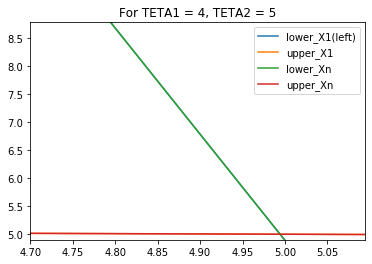

[4.994169402140235,
 4.8,
 4.994169402140236,
 4.994169402140235,
 nan,
 4.994169402140235]

[4.994169402140235,
 8.683388042804694,
 4.994169402140216,
 4.994169402140236,
 nan,
 4.994169402140235]

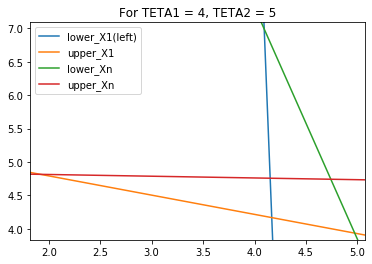

[4.167719743701636,
 4.094398885490526,
 4.152405706835352,
 4.974157903717902,
 1.9195149847954978,
 4.74189794314376]

[4.167719743701636,
 6.99010270204991,
 4.757211980010055,
 3.9354597831274933,
 4.81521880135487,
 4.74189794314376]

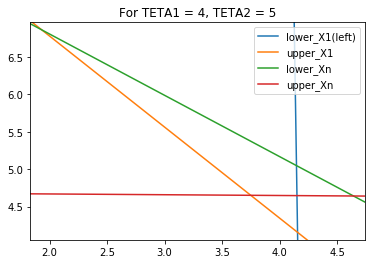

[4.154849174249529,
 4.145645640444524,
 4.149784403667685,
 1.9318378959766875,
 3.748409283468902,
 4.6409632393377676]

[4.154849174249529,
 5.0474031301184255,
 4.6460280099196325,
 6.863974517610609,
 4.6501667731427725,
 4.6409632393377676]

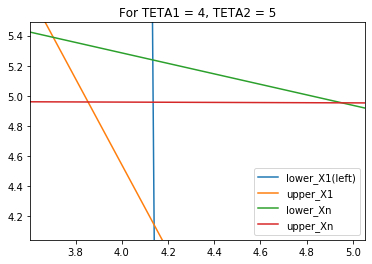

[4.139722608004197,
 4.134073901888069,
 4.135522075700698,
 3.7035329946273357,
 3.853913548755324,
 4.952347862812679]

[4.139722608004197,
 5.238156922061762,
 4.956548395116101,
 5.388537476189539,
 4.957996568928806,
 4.952347862812679]

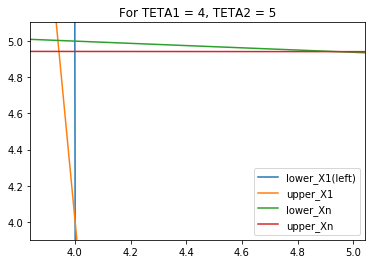

[4.000852072871693,
 3.9998266364902704,
 3.999885339785015,
 3.9389314931588215,
 3.9426915196767327,
 4.941760212270299]

[4.000852072871693,
 4.999920765465049,
 4.942726945356753,
 5.003680791983179,
 4.942785648651721,
 4.941760212270299]

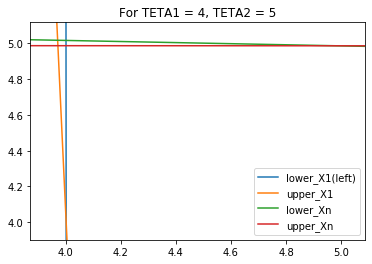

[4.002237396243239,
 4.0017174956495785,
 4.0017325883749715,
 3.971393604131721,
 3.9723157705908196,
 4.985639781447176]

[4.002237396243239,
 5.0155614070999945,
 4.9861445893157,
 5.0164835735586735,
 4.986159682040807,
 4.985639781447176]

In [8]:
for n in n_tup:
    x = []
    y = []
    sample = sts.uniform.rvs(loc=TETA1, scale=TETA2-TETA1, size=n)
    X1 = min(sample)
    Xn = max(sample)
    plt.plot(domain, T2_line(domain, quantile_1(alpha/2, n), X1), label='lower_X1(left)')
    plt.plot(domain, T2_line(domain, quantile_1(1- alpha/2, n), X1), label='upper_X1')
    plt.plot(domain, T2_line(domain, quantile_2(alpha/2, n), Xn), label='lower_Xn')
    plt.plot(domain, T2_line(domain, quantile_2(1- alpha/2, n), Xn), label='upper_Xn')
    plt.legend()
    #Найдем точки пересечения
    
    #1 и 2
    x.append(X1)
    y.append(X1)
    
    #1 и 3
    x0 = (Xn/quantile_2(alpha/2, n) - X1/quantile_1(alpha/2, n))/(1/quantile_2(alpha/2, n) - 1/quantile_1(alpha/2, n))
    x.append(x0)
    y.append(T2_line(x0, quantile_1(alpha/2, n), X1))
    
    #1 и 4
    x0 = (Xn/quantile_2(1 - alpha/2, n) - X1/quantile_1(alpha/2, n))/(1/quantile_2(1 - alpha/2, n) - 1/quantile_1(alpha/2, n))
    x.append(x0)
    y.append(T2_line(x0, quantile_1(alpha/2, n), X1))
    
    #2 и 3
    x0 = (Xn/quantile_2(alpha/2, n) - X1/quantile_1(1 - alpha/2, n))/(1/quantile_2(alpha/2, n) - 1/quantile_1(1 - alpha/2, n))
    x.append(x0)
    y.append(T2_line(x0, quantile_1(1- alpha/2, n), X1))
    
    #2 и 4 
    x0 = (Xn/quantile_2(1 - alpha/2, n) - X1/quantile_1(1 - alpha/2, n))/(1/quantile_2(1 - alpha/2, n) - 1/quantile_1(1 - alpha/2, n))
    x.append(x0)
    y.append(T2_line(x0, quantile_1(1- alpha/2, n), X1))
    
    #3 и 4
    x.append(Xn)
    y.append(Xn)
    
    plt.xlim(min(x)-0.1,max(x)+0.1)
    plt.ylim(min(y)-0.1, max(y)+0.1)
    plt.title('For TETA1 = ' + str(TETA1) + ', TETA2 = ' + str(TETA2))
    plt.show()
    display(x)
    display(y)